<IPython.core.display.Javascript object>


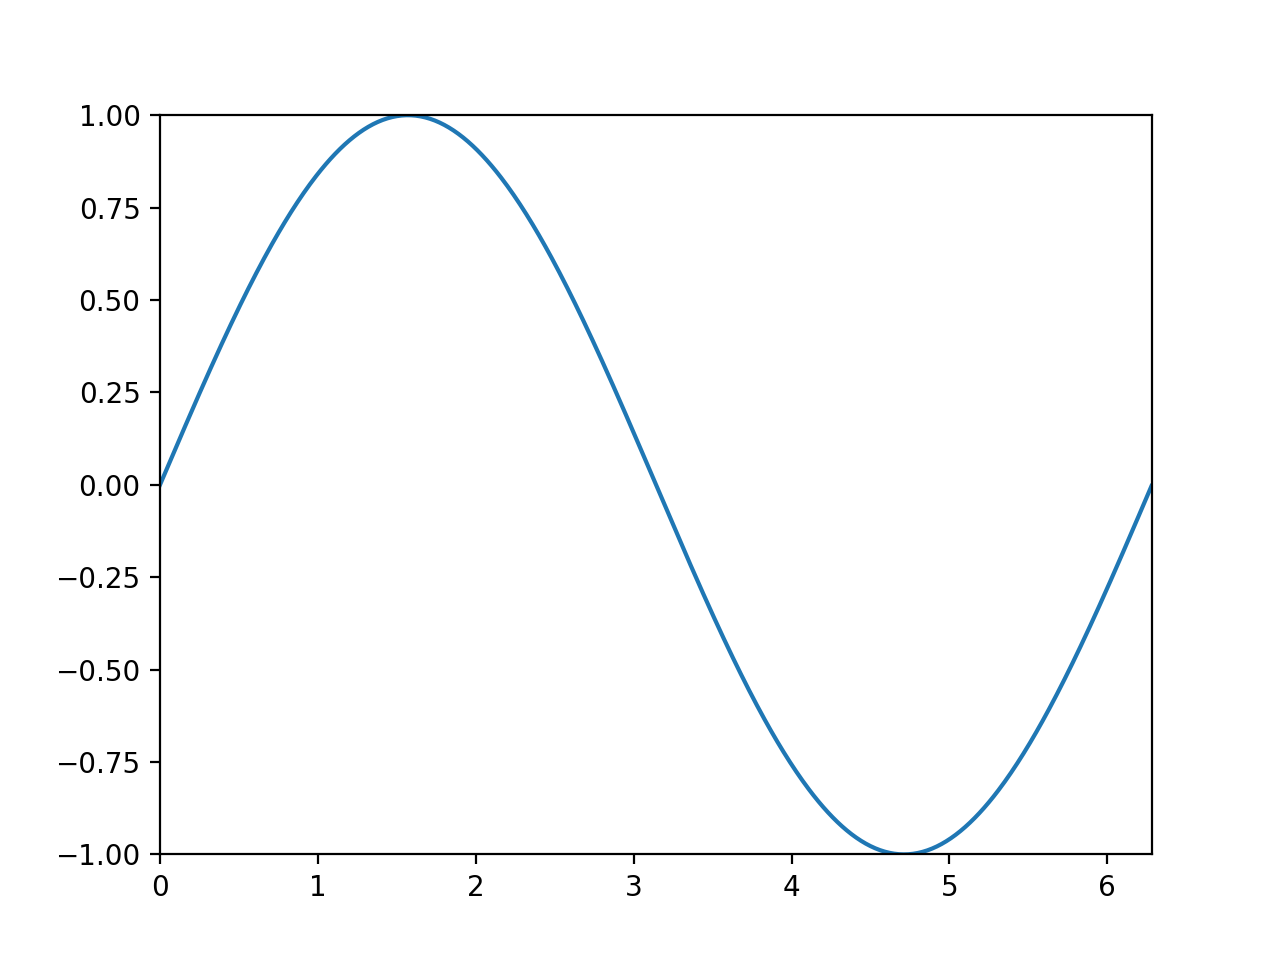

In [69]:
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook
#可以在jupyter里看到动画
import numpy as np

fig, ax = plt.subplots()#fig应该是整体的画布，ax是其中的一个
#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
x = np.arange(0, 2*np.pi, 0.01)#这里实际上已经给出了x和y的值
y = np.sin(x)
line, = ax.plot(x,np.sin(x))

#---------------------------------------------
#初始化函数
def init():
    ax.set_xlim(0, 2*np.pi)  
    ax.set_ylim(-1, 1)
    return line,
#---------------------------------------------
#动画函数
def animate(i):
    #x.append(i)         #将每次传过来的n追加到xdata中
    #y.append(np.sin(i))
    line.set_data(x[i],y[i])    #重新设置曲线的值
    return line,
#---------------------------------------------


#fig 进行动画绘制的figure
#func 自定义动画函数，即传入刚定义的函数animate
#frames 动画长度，一次循环包含的帧数
#init_func 自定义开始帧，即传入刚定义的函数init
#interval 更新频率，以ms计
#blit 选择更新所有的点还是仅仅更新刚刚产生的点
ani = animation.FuncAnimation(fig=fig,
                              func = animate,
                              frames=np.linspace(0, 2*np.pi, 10),
                              init_func = init,
                              #interval = 1,
                              blit = True)
plt.show()

<IPython.core.display.Javascript object>


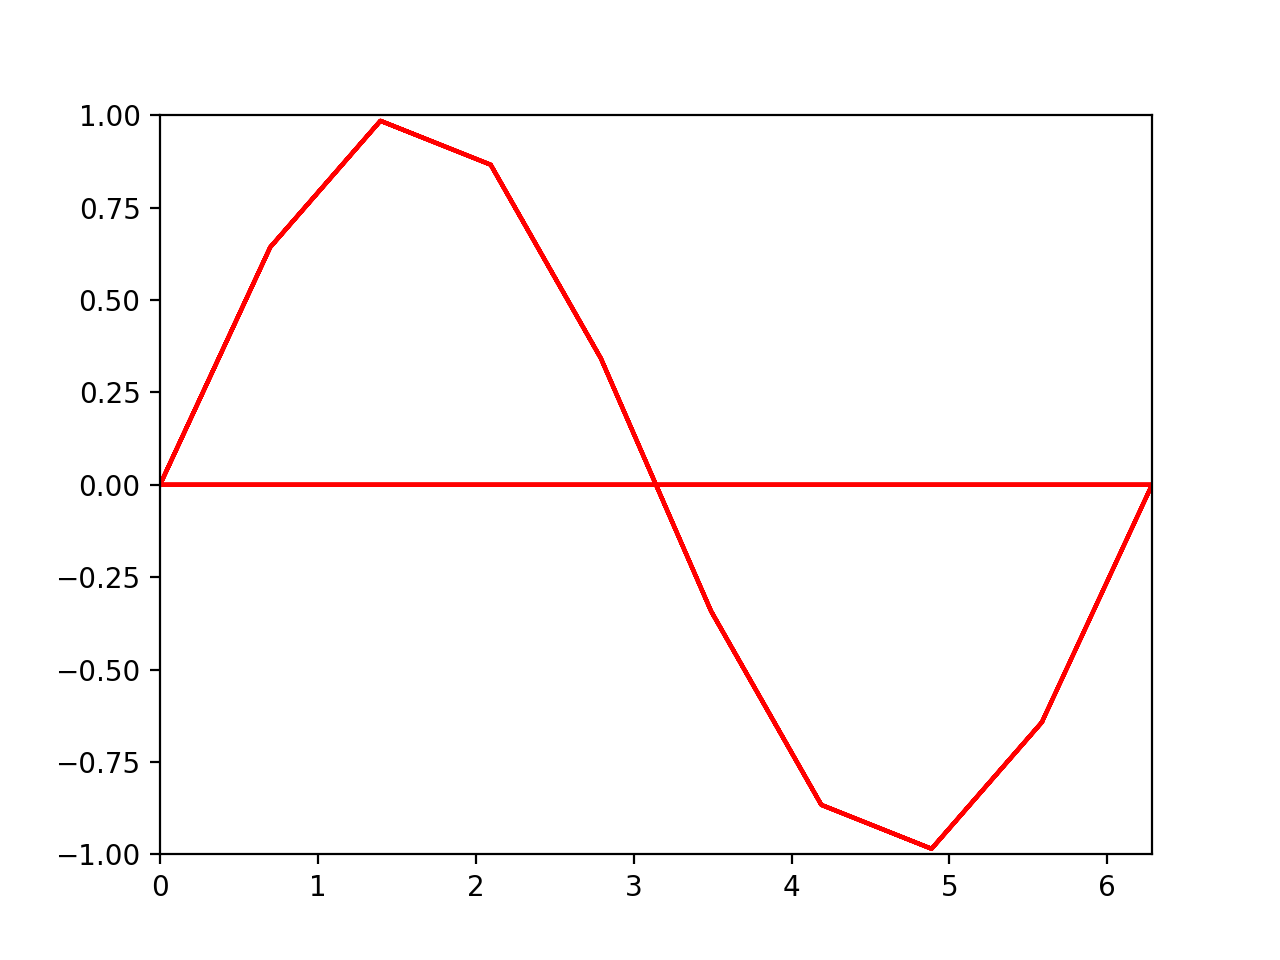

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()   #生成子图，相当于fig = plt.figure(),ax = fig.add_subplot(),其中ax的函数参数表示把当前画布进行分割，例：fig.add_subplot(2,2,2).表示将画布分割为两行两列
xdata, ydata = [], []      #初始化两个数组
ln, = ax.plot([], [], 'r-', animated=False)  #第三个参数表示画曲线的颜色和线型，具体参见：https://blog.csdn.net/tengqingyong/article/details/78829596

def init():
    ax.set_xlim(0, 2*np.pi)  
    ax.set_ylim(-1, 1)
    return ln,              

def update(n):
    xdata.append(n)         #将每次传过来的n追加到xdata中
    ydata.append(np.sin(n))
    ln.set_data(xdata, ydata)    #重新设置曲线的值
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 10),     #这里的frames在调用update函数是会将frames作为实参传递给“n”
                    init_func=init, blit=True)
plt.show()

<IPython.core.display.Javascript object>


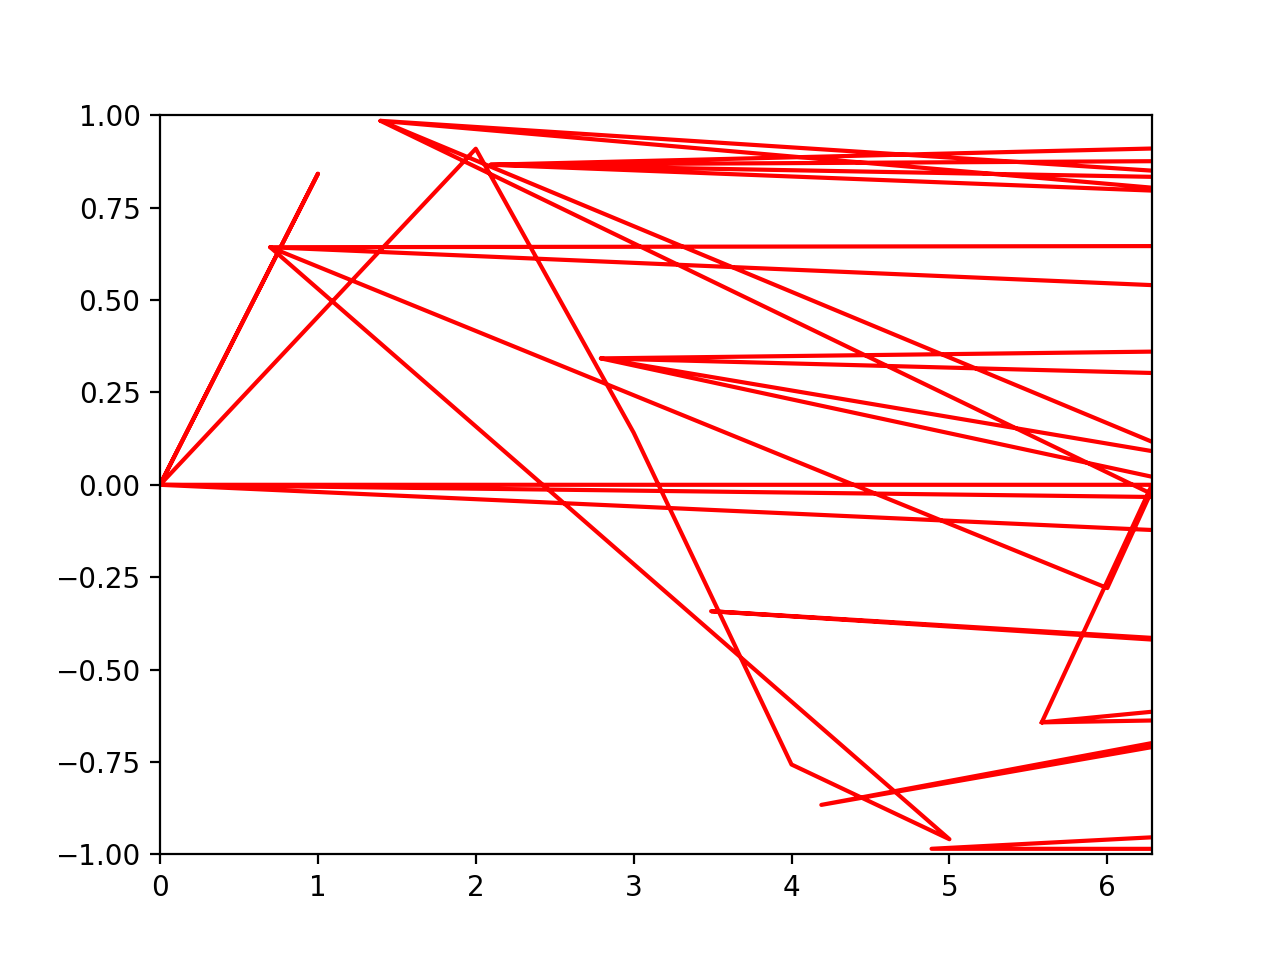

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig,ax = plt.subplots()
x = []
y = []
line, = ax.plot([],[],"r-",animated=False)

def init():
    ax.set_ylim(-1,1)
    ax.set_xlim(0,2*np.pi)
    return line,

def update(i):
    x.append(i)
    y.append(np.sin(i))
    line.set_data(x,y)
    return line,

fig = FuncAnimation(fig = fig,
                    func = update,
                     frames = 500,
                    init_func = init,
                    interval =10.0,
                    blit= True)
plt.show()

<IPython.core.display.Javascript object>


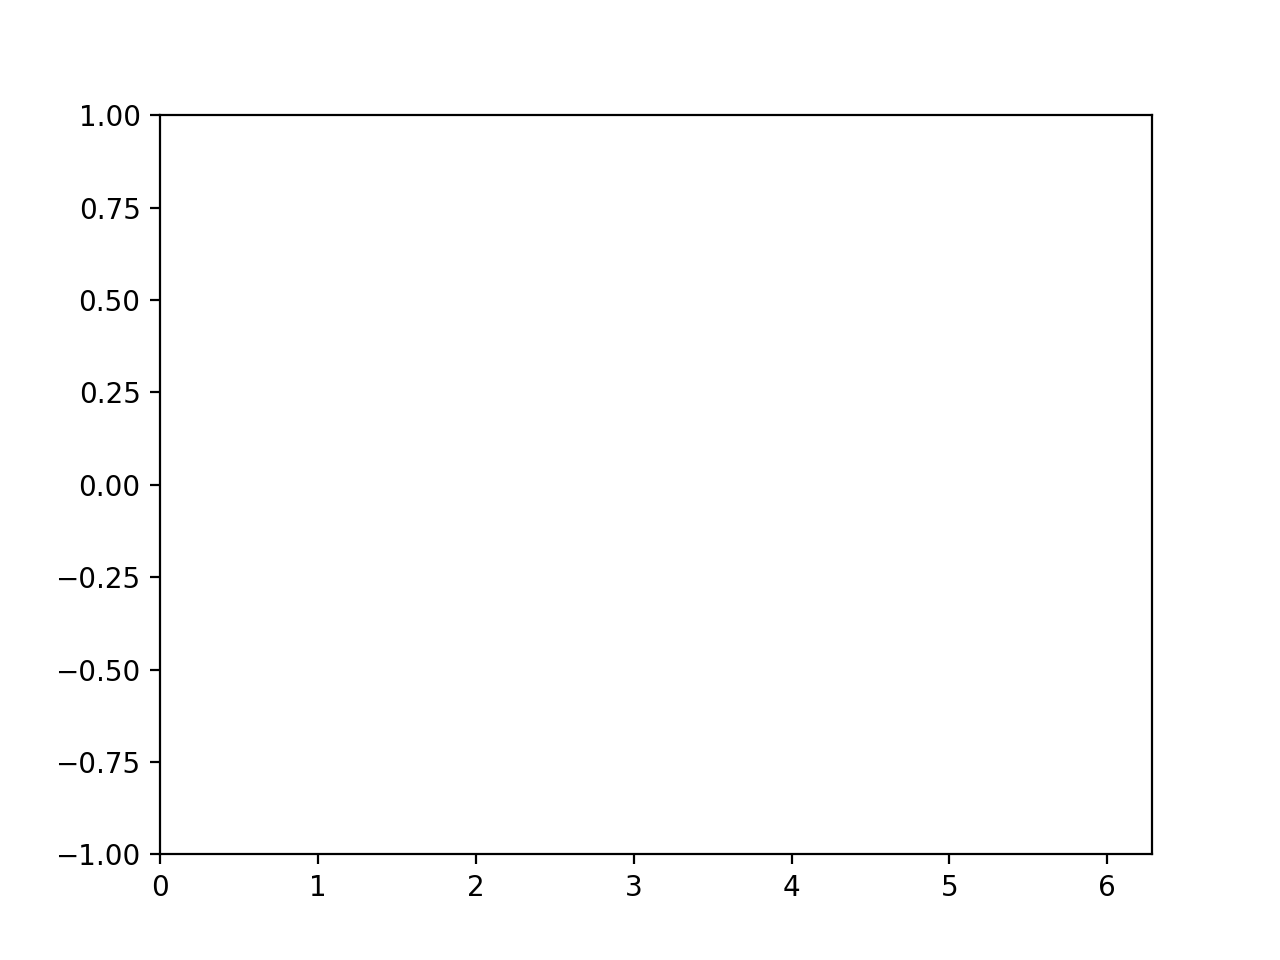

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
 
fig, ax = plt.subplots()
 
x = np.arange(0, 2, 0.01)
line, = ax.plot(np.exp(x))
 
 
def animate(i):
    line.set_ydata(np.exp(x+i))
    return line,
 
 
def init():
    line.set_ydata(np.exp(x))
    return line,
 
 
ani = animation.FuncAnimation(fig=fig, func=animate, frames=200,
                              init_func=init, interval=100, blit=True)
 


<IPython.core.display.Javascript object>


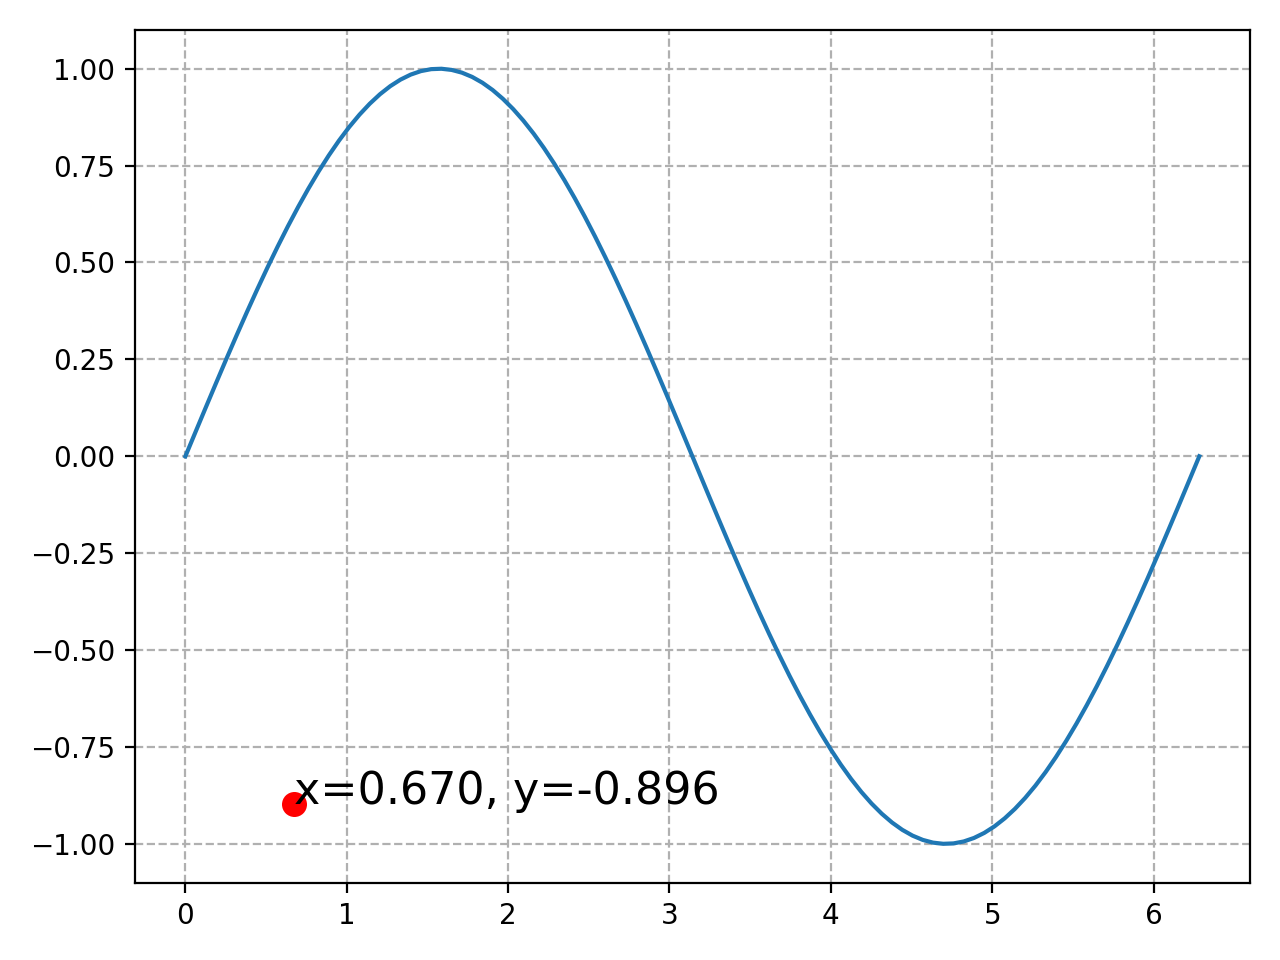

In [81]:
# coding: utf-8
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
def update_points(num):
    '''
    更新数据点，num代表当前帧的帧数，一定为整数，从0开始，FuncAnimation传入一个np.arange(0, 100),就是100帧，虽然num没有显示自动加1，但是确实加1了，可以打印num看看，真的。
    '''
 
    if num%5==0:
        point_ani.set_marker("*")
        point_ani.set_markersize(12)
    else:
        point_ani.set_marker("o")
        point_ani.set_markersize(8)
 
    point_ani.set_data(x[num], y[num])
    text_pt.set_text("x=%.3f, y=%.3f"%(x[num], y[num])) # num 代表第几个索引，一定是整数。
    text_pt.set_position((x[num], y[num])) # 设置文本位置。
    return point_ani,text_pt, # 返回的对象的内容是下一个帧的数据内容。这里是下一帧的点的位置，和下一帧文本的位置
 
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
 
fig = plt.figure(tight_layout=True)
plt.plot(x,y) # 这个图像曲线不画出来还不好使呢，不能正确呈现动态图。
point_ani, = plt.plot(x[0], y[0], "ro") # 先画一个点，这个点不管比例尺多大都能看清。返回一个对象，这个对象可以设置下一个点的位置。
plt.grid(ls="--")
text_pt = plt.text(4, 0.8, '', fontsize=16)
'''
第1个参数fig：即为我们的绘图对象.
第2个参数update_points：更新动画的函数.
第3个参数np.arrange(0, 100)：动画帧数，这需要是一个可迭代的对象。
interval参数：动画的时间间隔。
blit参数：是否开启某种动画的渲染。
'''
ani = animation.FuncAnimation(fig, func=update_points, frames=np.arange(0, 100), interval=100, blit=True)
'''
np.arange(0, 100) 这个表示 动画的帧数，这里是100帧，为什么设置成100呢？因为x总共有100个点。
假设设置成2，代表有两帧，分别是x=0和x=下一个点的坐标。很不好看也没有意义。
frames=100效果一样
interval=100 # 前面说了一共有100帧，这里的100 代表每一帧和每一帧的间隔是100ms，越小则越快。越大跑的越慢。
设置成1000 就是间隔是1s走一下。
'''
 
# ani.save('sin_test2.gif', writer='imagemagick', fps=10)
plt.show()
